In [ ]:
!pip install scikeras --upgrade
!pip install tensorflow --upgrade # Also recommended to upgrade tensorflow

   ID  Age  Experience  Income  Zipcode  Family    CCAvg  Education  Mortgage  \
0   1   39          14  127000    49560       1   567.28          2     36000   
1   2   36           0   72000    63865       1  3927.17          1    341000   
2   3   37           5  147000    56686       2   369.79          1    326000   
3   4   55           4  199000    85910       4  3847.52          3    406000   
4   5   45          17  177000    14675       1    26.63          2    424000   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       1           0              1  
1                   1           0       0           0              0  
2                   0           0       0           1              0  
3                   0           0       0           0              0  
4                   0           0       0           0              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (t

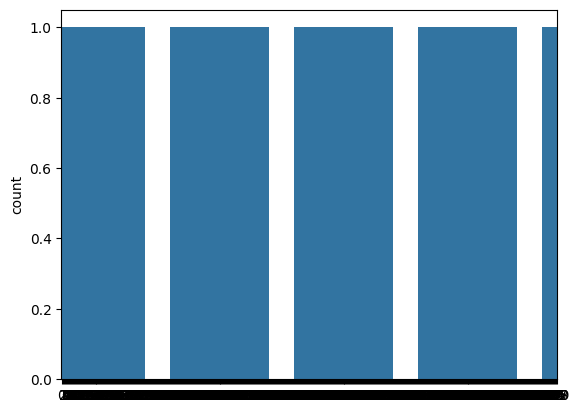

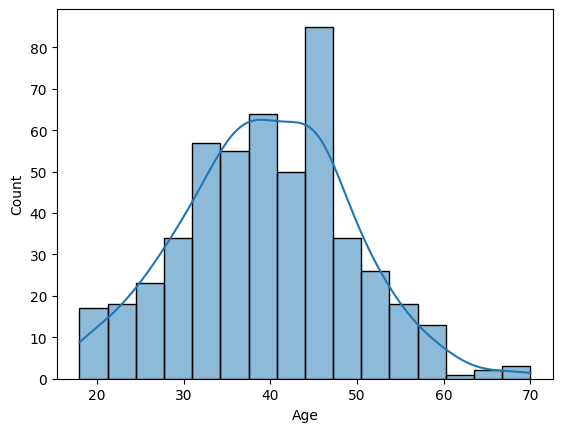

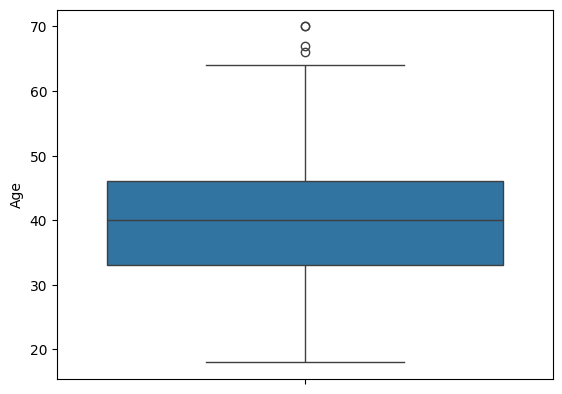

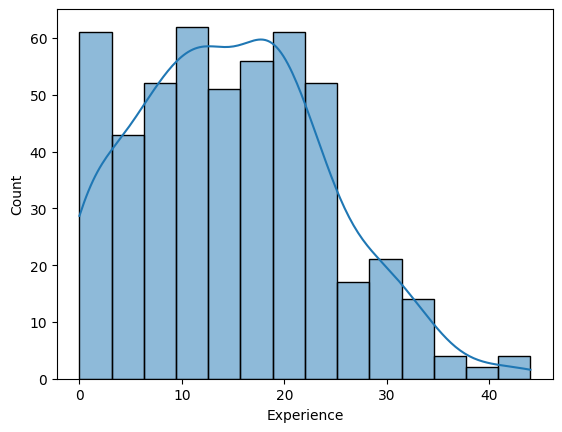

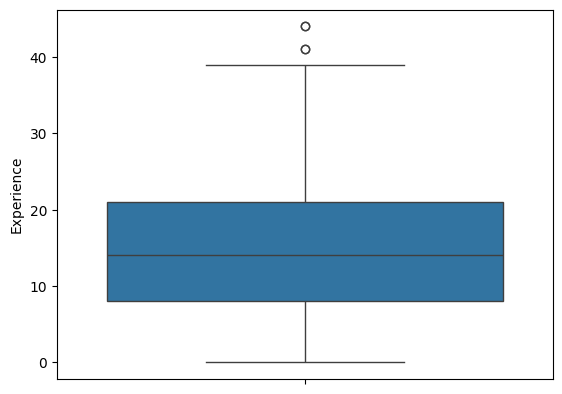

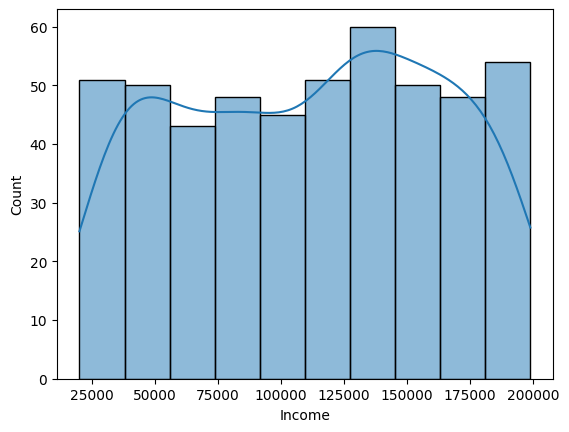

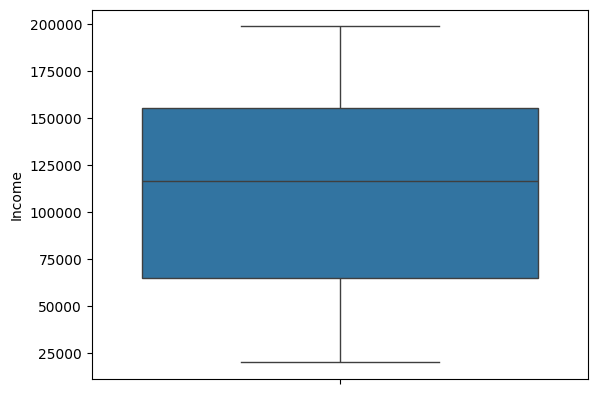

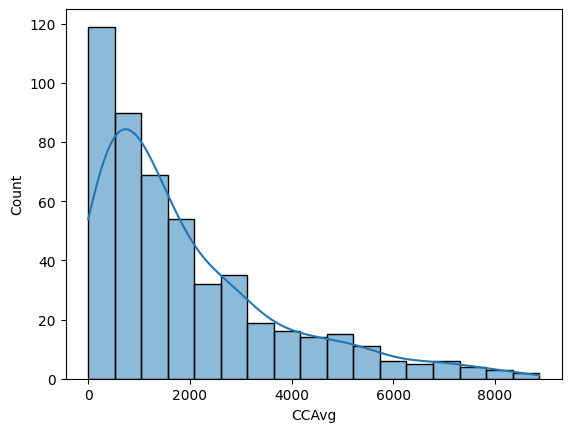

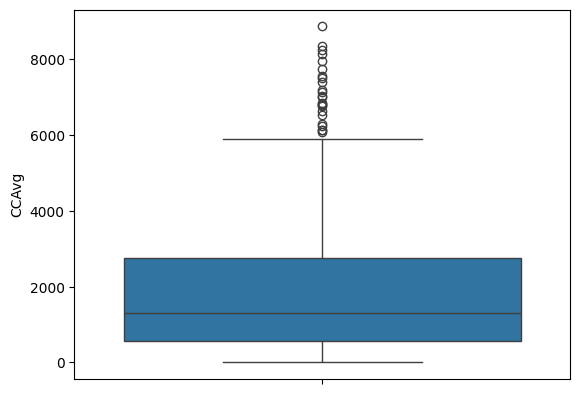

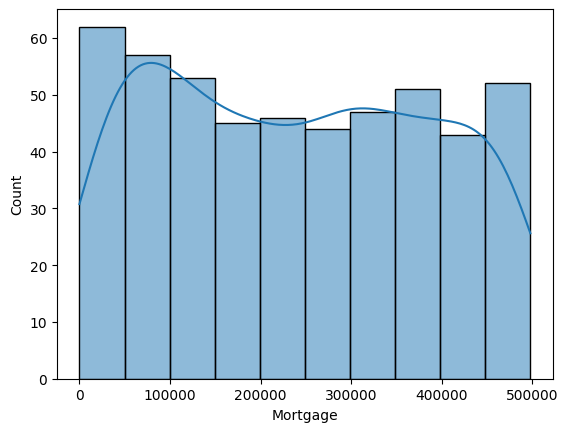

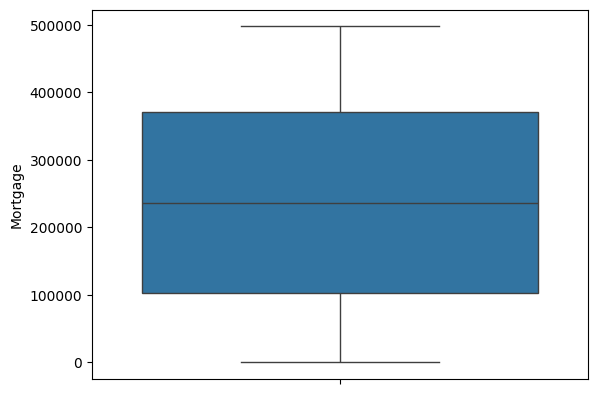

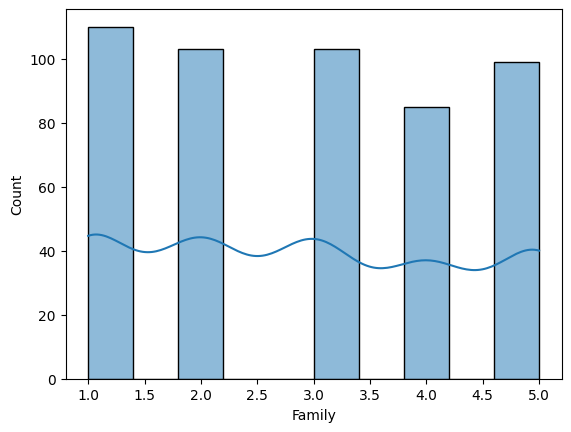

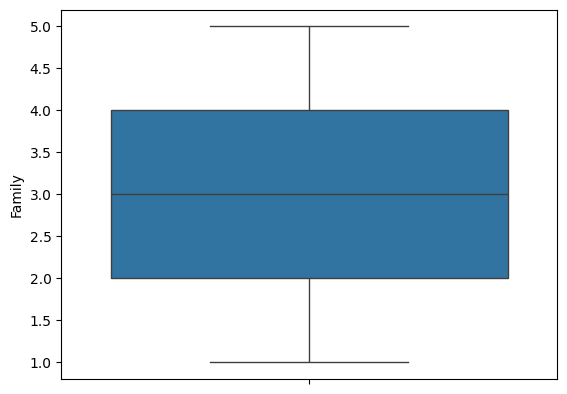

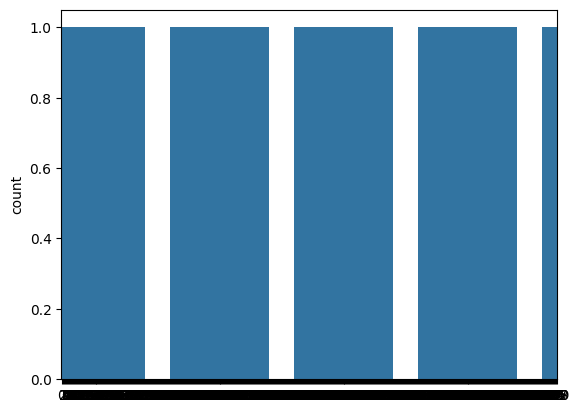

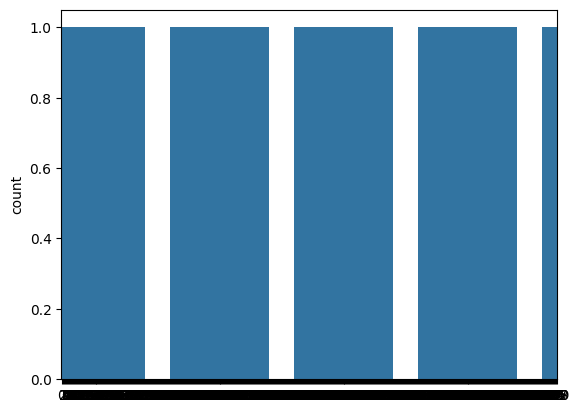

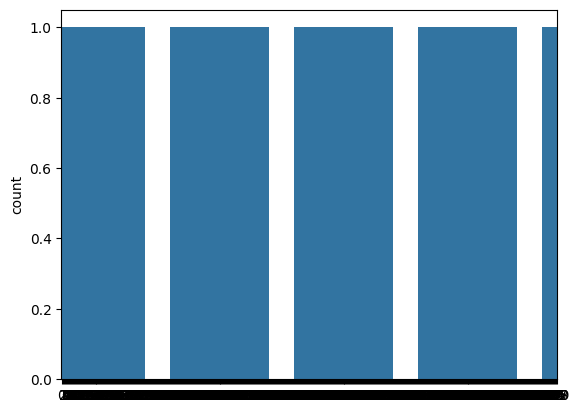

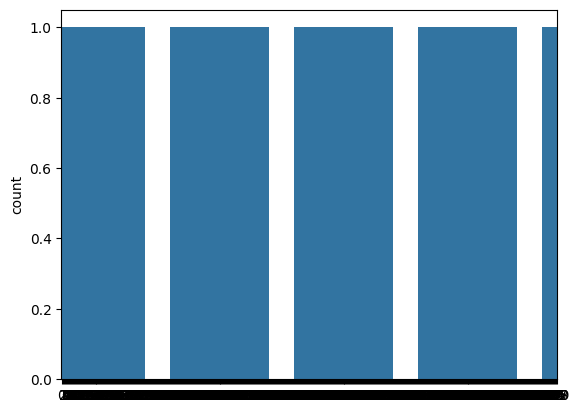

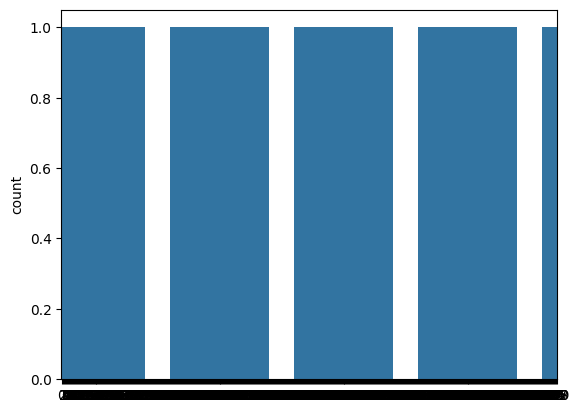

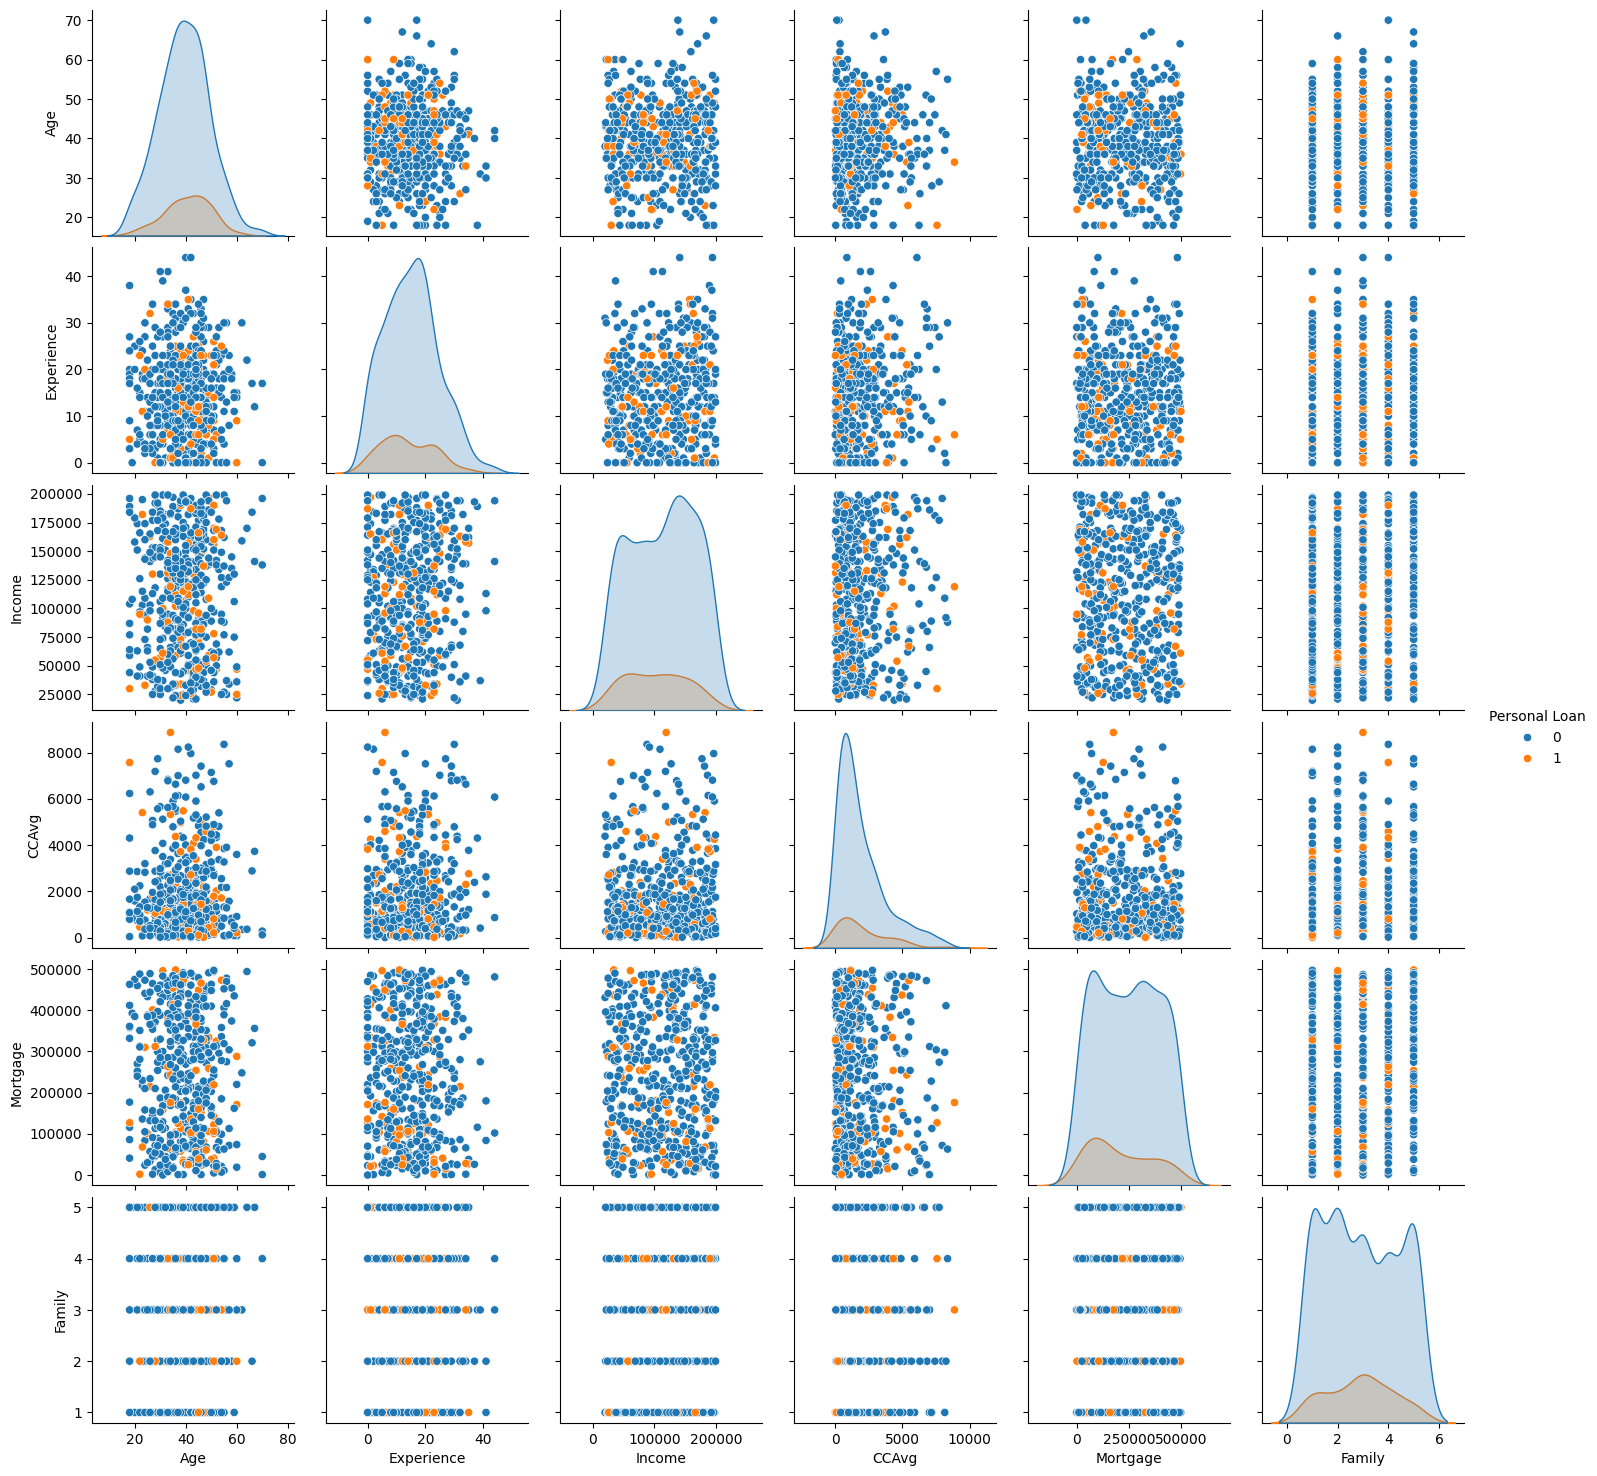

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5077 - loss: 1810.6162 - val_accuracy: 0.4853 - val_loss: 328.2556
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5245 - loss: 942.3930 - val_accuracy: 0.4853 - val_loss: 255.9930
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5361 - loss: 787.3267 - val_accuracy: 0.5147 - val_loss: 76.8281
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5187 - loss: 565.2158 - val_accuracy: 0.4853 - val_loss: 45.2463
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4761 - loss: 351.1578 - val_accuracy: 0.4853 - val_loss: 42.4425
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 226.3982 - val_accuracy: 0.4853 - val_loss: 42.4146
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5456 - loss: 133.3956 - val_accuracy: 0.4853 - val_loss: 15.6380
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5069 - loss: 140.7260 - val_accuracy: 0.

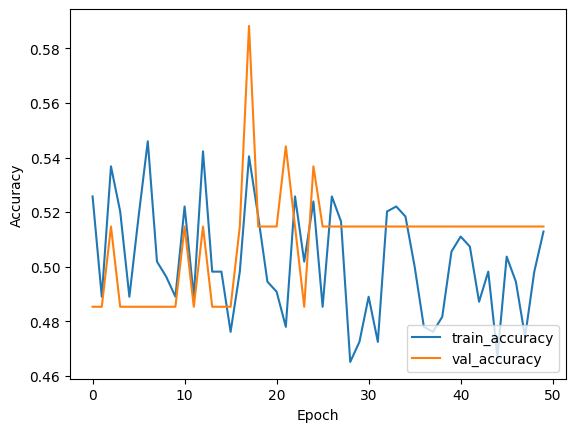

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5296 - loss: 0.6920
Validation Accuracy: 0.5147
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5267 - loss: 0.6921 
Test Accuracy: 0.5118
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.5118
Precision: 0.5118
Recall: 1.0000
F1-Score: 0.6770
ROC-AUC: 0.5000


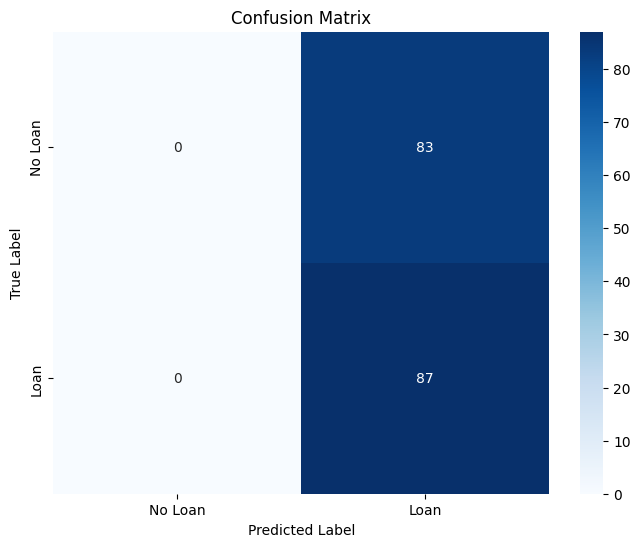

X_train Shape: (320, 12)
X_test Shape: (100, 12)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier # Import KerasClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
# ... (rest of your code) ...

# 1. Problem Statement & 2. Dataset Description (Load Data)
data = pd.read_csv('/content/Bank_customer_data.csv') # Replace with your file path

# 3. Exploratory Data Analysis (EDA) & Data Visualization
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check class imbalance
print(data['Personal Loan'].value_counts())
sns.countplot(data['Personal Loan'])
plt.show()

# Visualize numerical features
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.show()
    sns.boxplot(data[feature])
    plt.show()

# Visualize categorical features
categorical_features = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features:
    sns.countplot(data[feature])
    plt.show()

# Pair plots
sns.pairplot(data[numerical_features + ['Personal Loan']], hue='Personal Loan')
plt.show()

#4
# Drop ID and Zipcode
data = data.drop(['ID', 'ZIP Code'], axis=1, errors='ignore')

# Handle class imbalance (example: oversampling)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Personal Loan')], axis=1)

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
data_resampled[numerical_cols] = scaler.fit_transform(data_resampled[numerical_cols])

# Split data
X = data_resampled.drop('Personal Loan', axis=1)
y = data_resampled['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#5
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#Plot the training history.
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
#6
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Make predictions

# Make predictions
y_pred_prob = model.predict(X_test, batch_size=32).flatten()  # Use batch processing
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#7
# Drop unnecessary columns

X = data.drop(columns=['Personal Loan'])  # All features except target
y = data['Personal Loan']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)


#8 Function to create the model (Fixed Input Layer)
def create_model(learning_rate=0.01, num_neurons=32, dropout_rate=0.2):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicit Input Layer
        Dense(num_neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model in KerasClassifier and explicitly pass default parameters
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid (use 'model__' prefix for parameters)
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__num_neurons': [16, 32, 64],
    'model__dropout_rate': [0.2, 0.4, 0.5],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}


In [ ]:
!pip install scikeras --upgrade

In [ ]:
!pip install scikeras --upgrade

In [ ]:
!pip install tensorflow --upgrade

In [ ]:

from IPython import get_ipython
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/Bank_customer_data.csv')

data.head(3)

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,39,14,127000,49560,1,567.28,2,36000,1,0,1,0,1
1,2,36,0,72000,63865,1,3927.17,1,341000,1,0,0,0,0
2,3,37,5,147000,56686,2,369.79,1,326000,0,0,0,1,0


In [ ]:
# Check if columns exist before dropping
if 'ID' in data.columns and 'Zipcode' in data.columns:
    data.drop(['ID', 'Zipcode'], axis=1, inplace=True)
else:
    print("Columns 'ID' and/or 'Zipcode' have already been removed.")

# Split into features and target
X = data.drop("Personal Loan", axis=1)
y = data["Personal Loan"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


# 6. Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
# 7. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 8. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 9. Evaluate on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5624 - loss: 15359.4912 - val_accuracy: 0.8250 - val_loss: 3485.3000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7540 - loss: 5473.1162 - val_accuracy: 0.8250 - val_loss: 6039.7705
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7996 - loss: 6771.6460 - val_accuracy: 0.8250 - val_loss: 6523.1084
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7673 - loss: 8064.6724 - val_accuracy: 0.8250 - val_loss: 6034.9814
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8104 - loss: 6328.0972 - val_accuracy: 0.8250 - val_loss: 5142.6714
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7970 - loss: 5211.9800 - val_accuracy: 0.8250 - val_loss: 3828.3418
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7488 - loss: 5572.6270 - val_accuracy: 0.8250 - val_loss: 3175.9714
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.805

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.80        85
           1       0.10      0.13      0.11        15

    accuracy                           0.68       100
   macro avg       0.47      0.45      0.46       100
weighted avg       0.72      0.68      0.70       100


Confusion Matrix:
 [[66 19]
 [13  2]]


In [ ]:
# Create a DataFrame with actual vs predicted labels
df_test_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred.flatten()})

# Find misclassified cases
misclassified = df_test_results[df_test_results["Actual"] != df_test_results["Predicted"]]
print("Misclassified Samples:\n", misclassified.head())

Misclassified Samples:
      Actual  Predicted
439       0          1
328       0          1
147       1          0
457       1          0
172       1          0


PermutationExplainer explainer: 101it [00:28,  3.53it/s]
<ipython-input-6-cb6bcc3c284b>:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


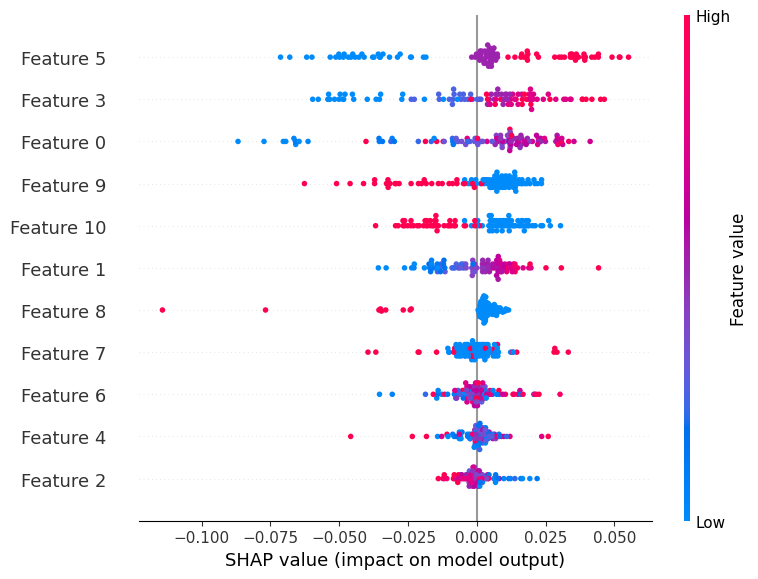

In [ ]:
import shap

# Use the trained model 'model' instead of 'best_model'
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)

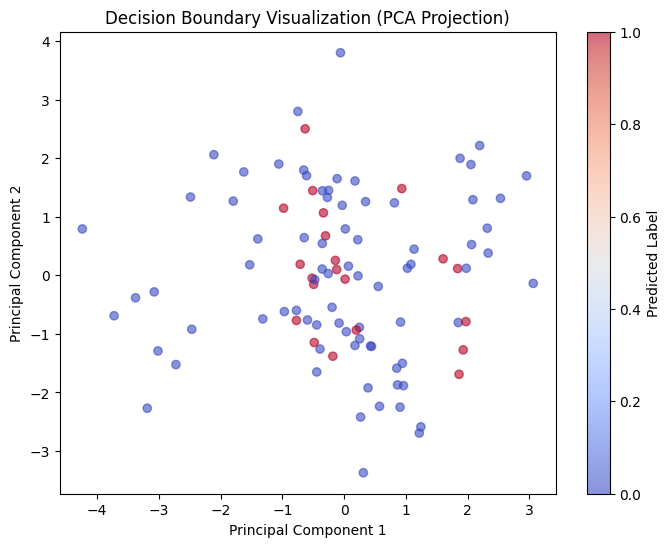

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred.flatten(), cmap="coolwarm", alpha=0.6)
plt.title("Decision Boundary Visualization (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Label")
plt.show()
